In [108]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [79]:
ticker = ['AAPL', 'DIS', 'IBM', 'KO', 'SPY', 'MSFT']

In [80]:
stocks = yf.download(ticker, start='2008-01-01')

[*********************100%%**********************]  6 of 6 completed


In [81]:
stocks

Adj Close                                                \
                  AAPL        DIS         IBM         KO        MSFT   
Date                                                                   
2008-01-02    5.898640  27.012506   58.999577  18.605789   25.628580   
2008-01-03    5.901366  26.953119   59.117939  18.800707   25.737726   
2008-01-04    5.450884  26.410152   56.993305  18.837252   25.017334   
2008-01-07    5.377923  26.435604   56.384644  19.281910   25.184687   
2008-01-08    5.184468  25.909611   54.998295  19.361097   24.340590   
...                ...        ...         ...        ...         ...   
2023-12-04  189.429993  92.010002  161.100006  58.570000  369.140015   
2023-12-05  193.419998  90.790001  161.389999  58.660000  372.519989   
2023-12-06  192.320007  91.500000  160.279999  58.599998  368.799988   
2023-12-07  194.270004  92.349998  160.220001  58.740002  370.950012   
2023-12-08  195.600006  92.713997  161.368698  58.490002  373.200012   

                             Close                                    ...  \
                   SPY        AAPL        DIS         IBM         KO  ...   
Date                                                                  ...   
2008-01-02  106.774925    6.958571  31.840000  100.086044  30.545000  ...   
2008-01-03  106.723351    6.961786  31.770000  100.286804  30.865000  ...   
2008-01-04  104.107964    6.430357  31.129999   96.682602  30.924999  ...   
2008-01-07  104.019554    6.344286  31.160000   95.650093  31.655001  ...   
2008-01-08  102.339806    6.116071  30.540001   93.298279  31.785000  ...   
...                ...         ...        ...         ...        ...  ...   
2023-12-04  456.690002  189.429993  92.010002  161.100006  58.570000  ...   
2023-12-05  456.600006  193.419998  90.790001  161.389999  58.660000  ...   
2023-12-06  454.760010  192.320007  91.500000  160.279999  58.599998  ...   
2023-12-07  458.230011  194.270004  92.349998  160.220001  58.740002  ...   
2023-12-08  459.475006  195.600006  92.713997  161.368698  58.490002  ...   

                  Open                                         Volume  \
                   IBM         KO        MSFT         SPY        AAPL   
Date                                                                    
2008-01-02  104.196938  30.725000   35.790001  146.529999  1079178800   
2008-01-03  100.219887  30.584999   35.220001  144.910004   842066400   
2008-01-04   99.378586  30.840000   35.189999  143.339996  1455832000   
2008-01-07   95.841301  31.049999   34.549999  141.809998  2072193200   
2008-01-08   95.650093  31.795000   34.709999  142.080002  1523816000   
...                ...        ...         ...         ...         ...   
2023-12-04  160.289993  58.590000  369.100006  455.600006    43389500   
2023-12-05  160.759995  58.549999  366.450012  455.260010    66628400   
2023-12-06  161.589996  58.560001  373.540009  458.809998    41089700   
2023-12-07  161.000000  58.669998  368.230011  456.910004    47433900   
2023-12-08  160.000000  58.740002  369.200012  457.459991    28395765   

                                                               
                 DIS       IBM        KO      MSFT        SPY  
Date                                                           
2008-01-02   9269900   9940661  15453800  63004200  204935600  
2008-01-03   9681100   7875229  13902600  49599600  125133300  
2008-01-04   9550700  11542192  18027400  72090800  232330900  
2008-01-07  10742900  13232318  23782000  80164300  234991000  
2008-01-08  13014300   9868382  20883200  79148300  326365700  
...              ...       ...       ...       ...        ...  
2023-12-04  12602800   5779000  14942200  32063300   72430900  
2023-12-05  12357000   4556700  11891500  23065000   69793500  
2023-12-06  10462000   3555900  14868500  21182100   69124700  
2023-12-07  10258300   3664800  11586000  23099800   66935600  
2023-12-08   4387721   1424529   4376686  10566007   44297593  

[4013

In [82]:
close=stocks.loc[:,'Close']

<ipython-input-83-187f3a53a8db>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


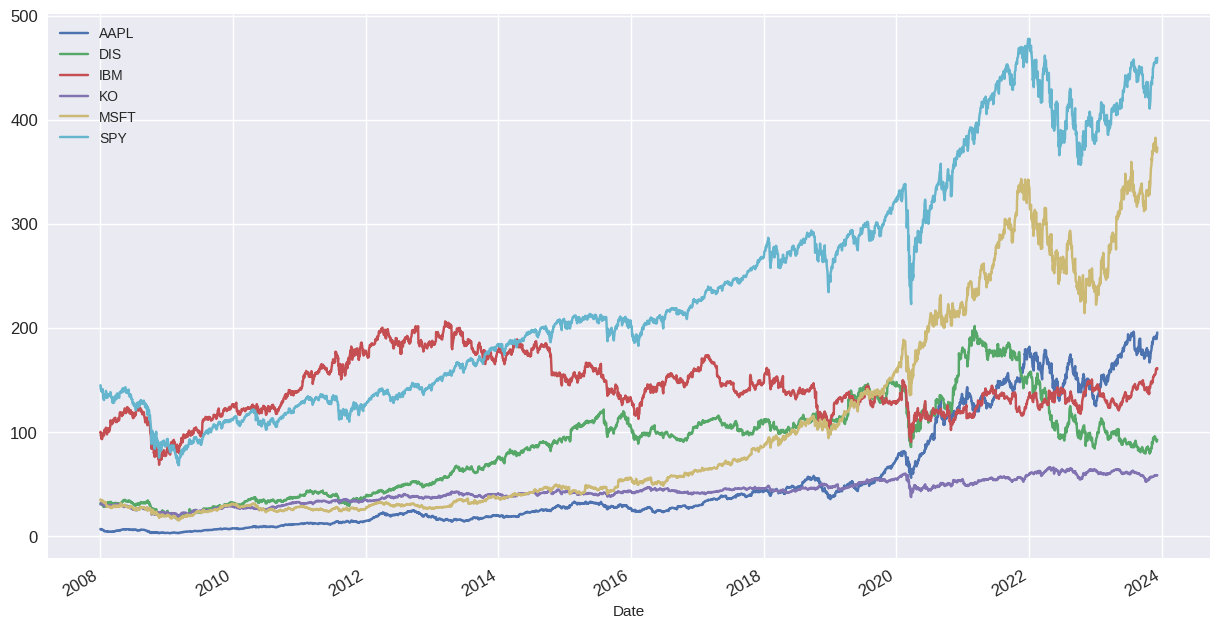

In [83]:
%matplotlib inline
plt.style.use('seaborn')

close.plot( figsize=(15,8), fontsize=12)
plt.show()

In [84]:
normClose = close.div(close.iloc[1]).mul(100)

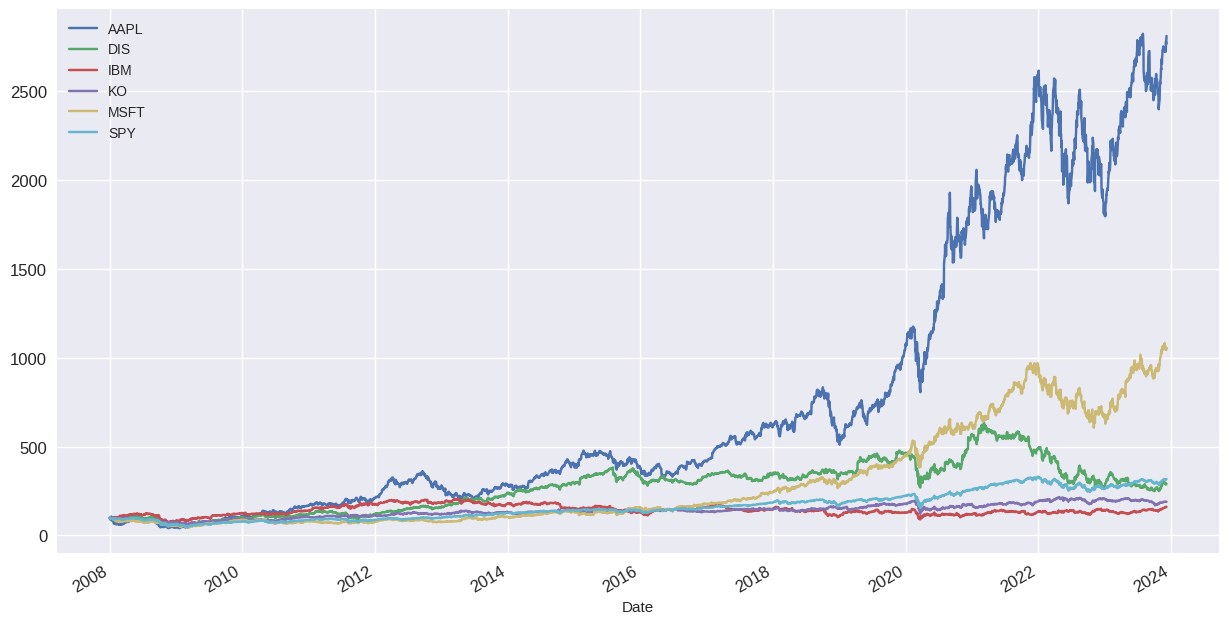

In [85]:
normClose.plot( figsize=(15,8), fontsize=12)
plt.show()

## Closing values for Apple

In [86]:
aapl = close.AAPL.copy().to_frame()

In [87]:
aapl

,AAPL
Date,
2008-01-02,6.958571
2008-01-03,6.961786
2008-01-04,6.430357
2008-01-07,6.344286
2008-01-08,6.116071
...,...
2023-12-04,189.429993
2023-12-05,193.419998
2023-12-06,192.320007


In [88]:
aapl['change'] = aapl.pct_change(periods=1).mul(100)

In [89]:
aapl.dropna(inplace=True)
aapl.head()

,AAPL,change
Date,,
2008-01-03,6.961786,0.046200
2008-01-04,6.430357,-7.633513
2008-01-07,6.344286,-1.338511
2008-01-08,6.116071,-3.597170
2008-01-09,6.407143,4.759132


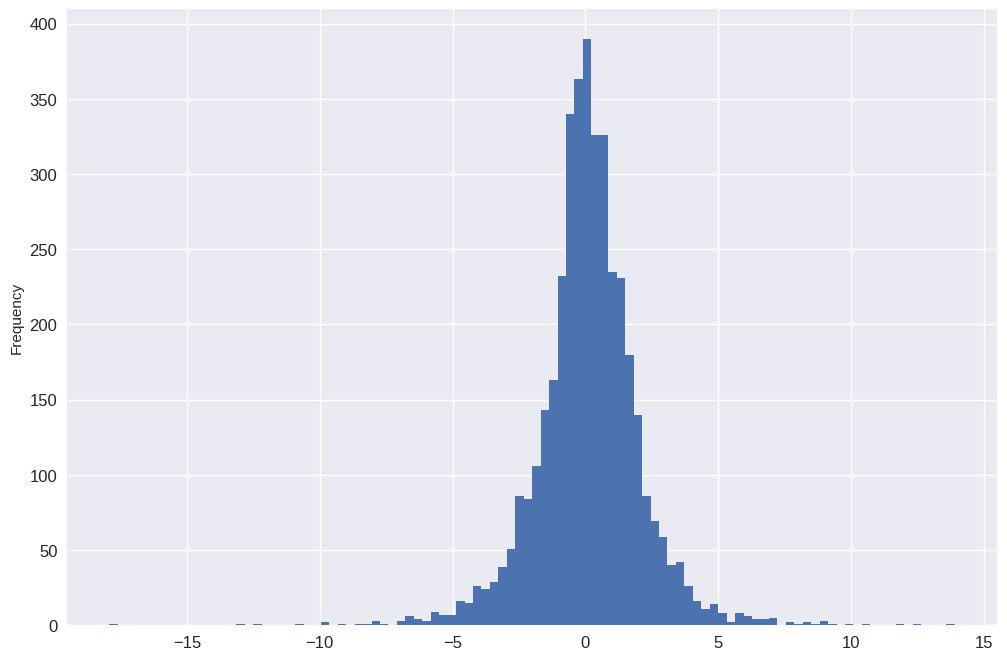

In [90]:
aapl.change.plot(kind='hist', figsize=(12,8), fontsize=12, bins=100)
plt.show()

## Calculating mean, variance and standard deviation

In [91]:
dail_mean_ret = aapl.change.mean()
dail_mean_ret

0.10280731380506454

In [92]:
daily_std_ret = aapl.change.std()
daily_std_ret

1.9783216730305018

In [93]:
annual_mean = dail_mean_ret*252
annual_mean

25.907443078876263

In [94]:
annual_std = daily_std_ret*math.sqrt(252)
annual_std

31.40488296076767

In [95]:
ret = close.pct_change(periods=1).dropna()

In [96]:
ret

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2008-01-03,0.000462,-0.002198,0.002006,0.010476,0.004259,-0.000483
2008-01-04,-0.076335,-0.020145,-0.035939,0.001944,-0.027990,-0.024506
2008-01-07,-0.013385,0.000964,-0.010679,0.023606,0.006690,-0.000849
2008-01-08,-0.035972,-0.019897,-0.024588,0.004107,-0.033516,-0.016148
2008-01-09,0.047591,-0.012443,0.007378,0.026742,0.029596,0.010510
...,...,...,...,...,...,...
2023-12-04,-0.009465,-0.006157,0.003426,-0.001194,-0.014339,-0.005249
2023-12-05,0.021063,-0.013259,0.001800,0.001537,0.009156,-0.000197
2023-12-06,-0.005687,0.007820,-0.006878,-0.001023,-0.009986,-0.004030


In [97]:
summary = ret.describe().T.loc[:,['mean','std']]

In [98]:
summary['mean'] = summary['mean'].mul(252)
summary['std'] = summary['std'].mul(np.sqrt(252))

In [99]:
summary

,mean,std
AAPL,0.259074,0.314049
DIS,0.109565,0.291832
IBM,0.058270,0.237424
KO,0.059530,0.193495
MSFT,0.189540,0.287517
SPY,0.093377,0.204292


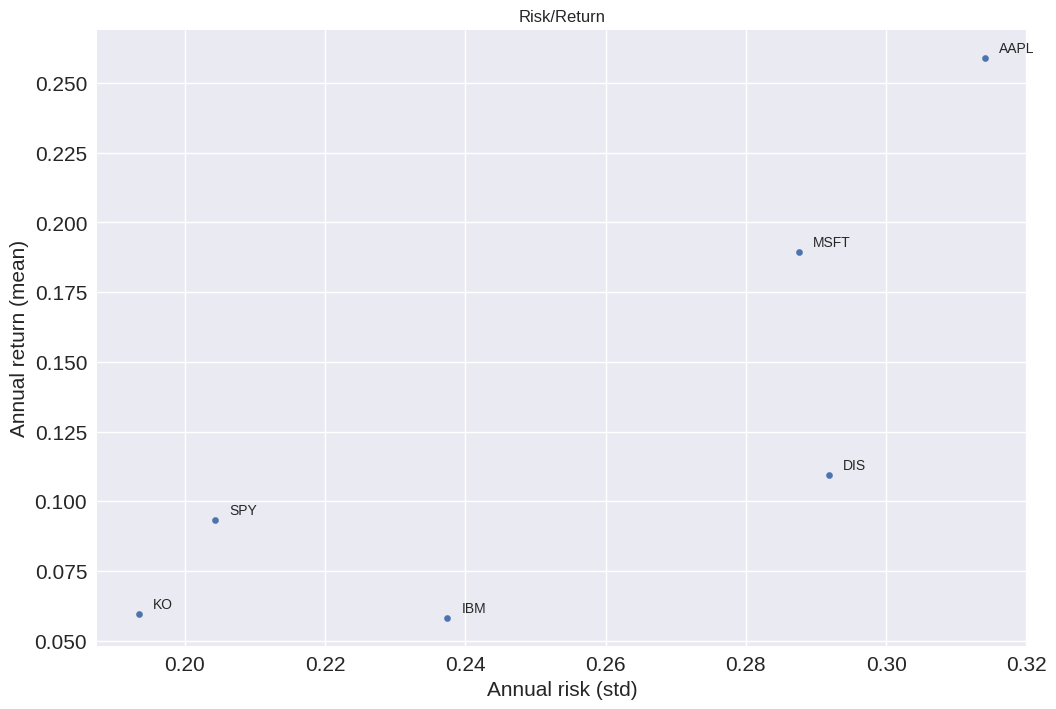

In [104]:
summary.plot.scatter(x='std',y='mean', figsize=(12,8), fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,'std']+0.002, summary.loc[i,'mean']+0.002))
plt.xlabel('Annual risk (std)', fontsize=15)
plt.ylabel('Annual return (mean)', fontsize=15)
plt.title('Risk/Return')
plt.show()

## Covariance and correlation

In [105]:
ret.cov()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,0.000391,0.000164,0.000134,0.000087,0.000208,0.000174
DIS,0.000164,0.000338,0.000137,0.000108,0.000176,0.000175
IBM,0.000134,0.000137,0.000224,0.000086,0.000136,0.000130
KO,0.000087,0.000108,0.000086,0.000149,0.000100,0.000098
MSFT,0.000208,0.000176,0.000136,0.000100,0.000328,0.000174
SPY,0.000174,0.000175,0.000130,0.000098,0.000174,0.000166


In [107]:
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.450381,0.453259,0.361965,0.581502,0.682018
DIS,0.450381,1.000000,0.499875,0.481204,0.529786,0.737615
IBM,0.453259,0.499875,1.000000,0.473572,0.503529,0.677155
KO,0.361965,0.481204,0.473572,1.000000,0.454473,0.624219
MSFT,0.581502,0.529786,0.503529,0.454473,1.000000,0.748543
SPY,0.682018,0.737615,0.677155,0.624219,0.748543,1.000000


<Axes: >

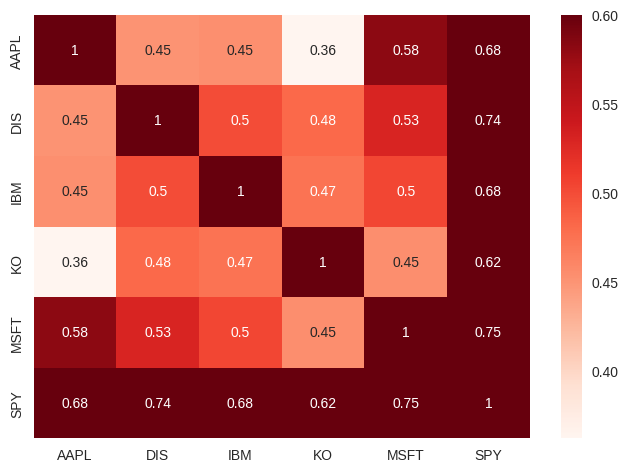

In [113]:
sns.heatmap(ret.corr(), cmap='Reds', annot=True, vmax=0.6)